# Proyecto Inteligencia Computacional - Proyecto 8 - ID 8a

## Integrantes
- Juan Pablo Contreras
- Pascual Marcone

## Ayudante
- Sebastian Guzman

# Dependencias

In [2]:
#libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib

#system
from pathlib import Path
import time

#ai
import torch
from torch import nn
import torchvision

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import src
from torch.utils.data import TensorDataset
importlib.reload(src)

<module 'src' (namespace) from ['/home/pascual/inteli/proyecto/src']>

# Data access

In [3]:
#load everything
stamps_dataset = pd.read_pickle('data/5stamps_dataset.pkl')
dataset_1_21 = pd.read_pickle('data/stamp_dataset_21_new.pkl')
dataset_2_28 = pd.read_pickle('data/stamp_dataset_28.pkl')
dataset_2_45 = pd.read_pickle('data/stamp_dataset_45.pkl')
dataset_1_45 = pd.read_pickle('data/stamp_dataset_jun_allwise_45_final.pkl')
dataset_2_63 = pd.read_pickle('data/stamp_dataset_only_images_63.pkl')
dataset_1_63 = pd.read_pickle('data/td_ztf_stamp_17_06_20.pkl')

In [4]:
#changing all labels to match for ease of use in the future
def rename_labels(dataset, old_value, new_value):
    for key in dataset.keys():
        if old_value in dataset[key]:
            dataset[key][new_value] = dataset[key].pop(old_value)

# apply the function to 
rename_labels(stamps_dataset, 'labels', 'class')
# rename_labels(dataset_1_63, 'labels', 'class')
rename_labels(stamps_dataset, 'science', 'images')

## Data Characterization

In [5]:
from anytree import Node, RenderTree

# stamps_dataset
root = Node(f"stamps_dataset -- {stamps_dataset['Train']['images'].shape}")
train = Node("Train", parent=root)
validation = Node("validation", parent=root)
test = Node("Test", parent=root)

labels = Node("labels", parent=train)
images = Node("images", parent=train)
template = Node("template", parent=train)
difference = Node("difference", parent=train)

s_labels = Node("labels", parent=validation)
s_images = Node("images", parent=validation)
s_template = Node("template", parent=validation)
s_difference = Node("difference", parent=validation)

t_labels = Node("labels", parent=test)
t_images = Node("images", parent=test)
t_template = Node("template", parent=test)
t_difference = Node("difference", parent=test)

# Render the tree
for pre, fill, node in RenderTree(root):
    print("%s%s" % (pre, node.name))
print('\n')

# dataset_1_21
root = Node(f"dataset_1_21 -- {dataset_1_21['Train']['images'].shape}")
train = Node("Train", parent=root)
validation = Node("validation", parent=root)
test = Node("Test", parent=root)

labels = Node("images", parent=train)
images = Node("features", parent=train)
template = Node("oid", parent=train)
difference = Node("class", parent=train)

s_labels = Node("images", parent=validation)
s_images = Node("features", parent=validation)
s_template = Node("oid", parent=validation)
s_difference = Node("class", parent=validation)

t_labels = Node("images", parent=test)
t_images = Node("features", parent=test)
t_template = Node("oid", parent=test)
t_difference = Node("class", parent=test)

for pre, fill, node in RenderTree(root):
    print("%s%s" % (pre, node.name))
print('\n')

# dataset_2_28
root = Node(f"dataset_2_28 -- {dataset_2_28['Train']['images'].shape}")
train = Node("Train", parent=root)
validation = Node("validation", parent=root)
test = Node("Test", parent=root)

labels = Node("images", parent=train)
images = Node("features", parent=train)
template = Node("oid", parent=train)
difference = Node("class", parent=train)

s_labels = Node("images", parent=validation)
s_images = Node("features", parent=validation)
s_template = Node("oid", parent=validation)
s_difference = Node("class", parent=validation)

t_labels = Node("images", parent=test)
t_images = Node("features", parent=test)
t_template = Node("oid", parent=test)
t_difference = Node("class", parent=test)

for pre, fill, node in RenderTree(root):
    print("%s%s" % (pre, node.name))
print('\n')

# dataset_2_45
root = Node(f"dataset_2_45 -- {dataset_2_45['Train']['images'].shape}")
train = Node("Train", parent=root)
validation = Node("validation", parent=root)
test = Node("Test", parent=root)

labels = Node("images", parent=train)
images = Node("features", parent=train)
template = Node("oid", parent=train)
difference = Node("class", parent=train)

s_labels = Node("images", parent=validation)
s_images = Node("features", parent=validation)
s_template = Node("oid", parent=validation)
s_difference = Node("class", parent=validation)

t_labels = Node("images", parent=test)
t_images = Node("features", parent=test)
t_template = Node("oid", parent=test)
t_difference = Node("class", parent=test)

for pre, fill, node in RenderTree(root):
    print("%s%s" % (pre, node.name))
print('\n')

# dataset_1_45
root = Node(f"dataset_1_45 -- {dataset_1_45['Train']['images'].shape}")
train = Node("Train", parent=root)
validation = Node("validation", parent=root)
test = Node("Test", parent=root)

labels = Node("images", parent=train)
images = Node("features", parent=train)
template = Node("oid", parent=train)
difference = Node("class", parent=train)

s_labels = Node("images", parent=validation)
s_images = Node("features", parent=validation)
s_template = Node("oid", parent=validation)
s_difference = Node("class", parent=validation)

t_labels = Node("images", parent=test)
t_images = Node("features", parent=test)
t_template = Node("oid", parent=test)
t_difference = Node("class", parent=test)

for pre, fill, node in RenderTree(root):
    print("%s%s" % (pre, node.name))
print('\n')

# dataset_2_63
root = Node(f"dataset_2_63 -- {dataset_2_63['Train']['images'].shape}")
train = Node("Train", parent=root)
validation = Node("validation", parent=root)
test = Node("Test", parent=root)

labels = Node("images", parent=train)
difference = Node("class", parent=train)

s_labels = Node("images", parent=validation)
s_difference = Node("class", parent=validation)

t_labels = Node("images", parent=test)
t_difference = Node("class", parent=test)

for pre, fill, node in RenderTree(root):
    print("%s%s" % (pre, node.name))
print('\n')

# dataset_1_63
root = Node(f"dataset_1_63 -- {dataset_1_63['Train']['images'].shape}")
train = Node("Train", parent=root)
validation = Node("validation", parent=root)
test = Node("Test", parent=root)

labels = Node("images", parent=train)
images = Node("features", parent=train)
difference = Node("labels", parent=train)

s_labels = Node("images", parent=validation)
s_images = Node("features", parent=validation)
s_difference = Node("labels", parent=validation)

t_labels = Node("images", parent=test)
t_images = Node("features", parent=test)
t_difference = Node("labels", parent=test)

for pre, fill, node in RenderTree(root):
    print("%s%s" % (pre, node.name))

stamps_dataset -- (123227, 5, 21, 21)
├── Train
│   ├── labels
│   ├── images
│   ├── template
│   └── difference
├── validation
│   ├── labels
│   ├── images
│   ├── template
│   └── difference
└── Test
    ├── labels
    ├── images
    ├── template
    └── difference


dataset_1_21 -- (72710, 21, 21, 3)
├── Train
│   ├── images
│   ├── features
│   ├── oid
│   └── class
├── validation
│   ├── images
│   ├── features
│   ├── oid
│   └── class
└── Test
    ├── images
    ├── features
    ├── oid
    └── class


dataset_2_28 -- (50594, 28, 28, 3)
├── Train
│   ├── images
│   ├── features
│   ├── oid
│   └── class
├── validation
│   ├── images
│   ├── features
│   ├── oid
│   └── class
└── Test
    ├── images
    ├── features
    ├── oid
    └── class


dataset_2_45 -- (50594, 45, 45, 3)
├── Train
│   ├── images
│   ├── features
│   ├── oid
│   └── class
├── validation
│   ├── images
│   ├── features
│   ├── oid
│   └── class
└── Test
    ├── images
    ├── features
    ├── oid
    └── c

# Visualizacion Datos
Hay 3 tipos de imagenes $21\cdot21$, $28\cdot28$, $45\cdot45$ y $63\cdot63$

In [33]:
print(dataset_2_45['Train']['features'].shape)

(50594, 23)


Analizando algunos ejemplos de cada una

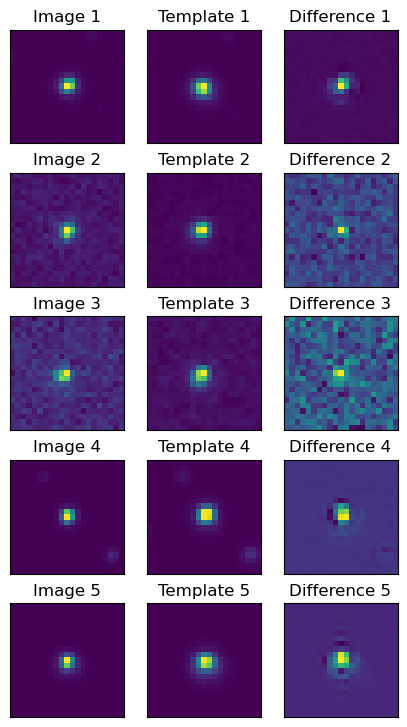

In [14]:
import src.plots as plots
importlib.reload(plots)

plots.plot_example(stamps_dataset, n = 5)

# Data Loader

In [6]:
train_difference = torch.tensor(stamps_dataset['Train']['difference'], dtype=torch.float32)
train_class = torch.tensor(stamps_dataset['Train']['class'], dtype=torch.float32)

validation_difference = torch.tensor(stamps_dataset['Validation']['difference'], dtype=torch.float32)
validation_class = torch.tensor(stamps_dataset['Validation']['class'], dtype=torch.float32)

test_difference = torch.tensor(stamps_dataset['Test']['difference'], dtype=torch.float32)
test_class = torch.tensor(stamps_dataset['Test']['class'], dtype=torch.float32)

# Reshape the arrays
num_samples, num_photos, height, width = train_difference.shape

reshaped_train_difference = train_difference.reshape(num_samples * num_photos, 1, height, width)
reshaped_train_class = train_class.repeat_interleave(num_photos)

num_samples, num_photos, height, width = validation_difference.shape

reshaped_val_difference = validation_difference.reshape(validation_difference.shape[0] * num_photos, 1, height, width)
reshaped_val_class = validation_class.repeat_interleave(num_photos)

num_samples, num_photos, height, width = test_difference.shape

reshaped_test_difference = test_difference.reshape(test_difference.shape[0] * num_photos, 1, height, width)
reshaped_test_class = test_class.repeat_interleave(num_photos)

train_dataset = TensorDataset(reshaped_train_difference, reshaped_train_class)
validation_dataset = TensorDataset(reshaped_val_difference, reshaped_val_class)
test_dataset = TensorDataset(reshaped_test_difference, reshaped_test_class)

print(train_dataset)

In [7]:
reshaped_train_difference.shape

torch.Size([616135, 1, 21, 21])

# Entrenamiento de Modelo

In [8]:
import src.model.train as train
importlib.reload(train)

import src.model.metrics as metrics
importlib.reload(metrics)

import src.model.vae as vae
importlib.reload(vae)

model = vae.VAE(latent_dim=21, img_size=21)

max_epochs = 30
criterion = vae.vae_loss_function
batch_size = 128
lr = 1e-4
early_stop = 20
use_gpu = False

curves, tiempo_ejecucion = train.train_model(model,
                                            train_dataset,
                                            validation_dataset,
                                            test_dataset,
                                            max_epochs=max_epochs,
                                            criterion=criterion,
                                            batch_size=batch_size,
                                            lr=lr,
                                            early_stopping_tolerance=early_stop,
                                            use_gpu=use_gpu) #falta definir los parámetros

curves_fig = metrics.show_curves(curves)

ValueError: not enough values to unpack (expected 4, got 3)

In [9]:
import src.model.test.train as train
importlib.reload(train)

import src.model.test.metrics as metrics
importlib.reload(metrics)

import src.model.test.vae as vae
importlib.reload(vae)


model = vae.Encoder(latent_dim=21)

max_epochs = 100
criterion = vae.loss_function
batch_size = 64
lr = 1e-4
early_stop = 100
use_gpu = False

curves, tiempo_ejecucion = train.train_model(model,
                                            train_dataset,
                                            validation_dataset,
                                            test_dataset,
                                            max_epochs=max_epochs,
                                            criterion=criterion,
                                            batch_size=batch_size,
                                            lr=lr,
                                            early_stopping_tolerance=early_stop,
                                            use_gpu=use_gpu) #falta definir los parámetros

curves_fig = metrics.show_curves(curves)

AttributeError: module 'src.model.test.vae' has no attribute 'loss_function'

In [42]:
dataset_1_21['Train']['features'].shape

(72710, 26)

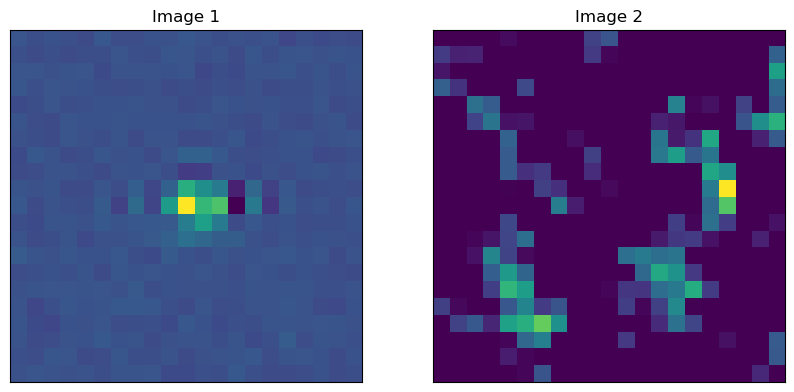

In [106]:
import src.plots as plots

# Select an image from the dataset
image = dataset_1_21['Train']['images'][0, :, :, 0]
vector = dataset_1_21['Train']['features'][0]
# Convert the image to a tensor
image_tensor = torch.tensor(image, dtype=torch.float32)
# Add a batch dimension and channel dimension to the image tensor
image_tensor = image_tensor.unsqueeze(0).unsqueeze(0)

# Create a DataLoader for the image tensor
image_loader = torch.utils.data.DataLoader(image_tensor, batch_size=1)



import src.model.vae as vae
importlib.reload(vae)

model_encoder = vae.Encoder(latent_dim=26)
mu, var = model_encoder.forward(image_tensor)
z = model_encoder.reparametrize(mu, var)

model_decoder = vae.Decoder(latent_dim=26)
reconstructed_image = model_decoder.forward(z)

plots.plot_two_images(image, reconstructed_image[0][0].detach().numpy())

AxesImage(shape=(21, 21))


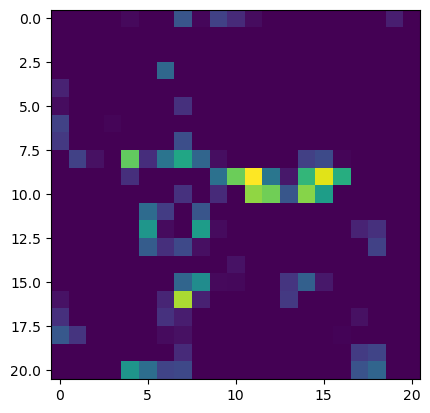

In [26]:
def reparametrize(mu, logvar):
    std = torch.exp(0.5 * logvar)
    eps = torch.randn_like(std)
    return mu + eps * std

mu = torch.tensor([[ 0.3630, -0.4114, -0.0574, -0.0282, -0.2116,  0.5139, -0.0025, -0.5460,
         -0.1863,  0.3187, -0.1244,  0.5469,  0.1740,  0.2918,  0.5020, -0.0702,
          0.1398,  0.2353,  0.1821,  0.2377,  0.2723, -0.2521,  0.4598,  0.4661,
          0.0595,  0.1334]])
logvar = torch.tensor([[-0.2444, -0.3525,  0.3974,  0.5036,  0.3790, -0.5399,  0.3296,  0.5853,
         -0.5699, -0.5726, -0.2416, -0.2500,  0.4732,  0.2860, -0.2805, -0.5622,
          0.3030,  0.6572,  0.4986,  0.1413,  0.1900, -0.2148,  0.2495,  0.0811,
          0.3873,  0.1809]])

reparametrize(mu, logvar)

tensor([[-0.8611, -1.1060,  0.1196, -1.6855,  0.9840, -1.6818, -2.3651,  0.8630,
         -0.6911, -1.5187,  0.5392,  2.0947,  0.7592,  0.8486,  2.1040, -0.5209,
          0.2399,  3.1231,  0.2955,  0.1468,  0.0072, -0.2940, -0.1506, -1.3936,
          0.3299, -0.3400]])

In [66]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F

class Encoder(nn.Module):
    def __init__(self, latent_dim):
        super(Encoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Flatten()
        )
        
        self.fc_mu = nn.Linear(64 * 6 * 6, latent_dim)
        self.fc_logvar = nn.Linear(64 * 6 * 6, latent_dim)

    def forward(self, x):
        h = self.encoder(x)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar
class Decoder(nn.Module):
    def __init__(self, latent_dim):
        super(Decoder, self).__init__()
        
        self.layers = nn.Sequential(
            
            # FCL
            nn.Linear(latent_dim, 64*6*6),
            nn.ReLU(),
            
            # Reshape to (64, 6, 6)
            nn.Unflatten(1, (64, 6, 6)),
            
            #1st Convolutional Layer
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            
            #2nd Convolutional Layer
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            
            # Nearest Neighbour interpolation
            nn.Upsample(size=(11,11), mode='nearest'),
            
            #3rd Convolutional Layer
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            
            #4th Convolutional Layer
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            
            # Nearest Neighbour interpolation
            nn.Upsample(size=(21,21), mode='nearest'),
            
            #5th Convolutional Layer
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),  
            
            #6th Convolutional Layer
            nn.Conv2d(64, 1, kernel_size=3, stride=1, padding=1),
            nn.ReLU()            
        )
    def forward(self, x):
        return self.layers(x)   
        
def reparametrize(mu, logvar):
    std = torch.exp(0.5 * logvar)
    eps = torch.randn_like(std)
    return mu + eps * std

z = reparametrize(mu, logvar)
print(z.shape)

output = model.decoder.forward(z)

torch.Size([1, 26])


AttributeError: 'Encoder' object has no attribute 'decoder'